In [1]:
import pandas as pd
from nltk.tokenize import TweetTokenizer
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv('infl_tweets.csv', index_col=0)
df

username                 name  \
0         davidfaber          David Faber   
1         davidfaber          David Faber   
2         davidfaber          David Faber   
3         davidfaber          David Faber   
4         davidfaber          David Faber   
...              ...                  ...   
14021  muddywatersre  MuddyWatersResearch   
14022  muddywatersre  MuddyWatersResearch   
14023  muddywatersre  MuddyWatersResearch   
14024  muddywatersre  MuddyWatersResearch   
14025  muddywatersre  MuddyWatersResearch   

                                                    text lang   in_reply_to  \
0      LVMH sales not good led by 5% decline in Fashi...   en           NaN   
1      NYC losing another iconic restaurant: The 21 C...   en           NaN   
2      ‚Å¶@DivesTech‚Å© always brightens our day. https:/...   en           NaN   
3      Statement from PIF on PGA Commissioner Monahan...   en           NaN   
4      Steve Cohen has entered exclusive negotiations...   en           NaN   
...                                                  ...  ...           ...   
14021  @CfaRoark @_KarlHungus_ @CliffordAsness I don‚Äô...   en  1.811785e+18   
14022  @_KarlHungus_ @CliffordAsness I‚Äôm not arguing ...   en  1.811781e+18   
14023  @CliffordAsness Biden showed a detailed, impre...   en  1.811771e+18   
14024  I‚Äôll be on @BloombergTV OpenInterest at 10 am ...   en           NaN   
14025  @John_Hempton Frankly, I‚Äôm more depressed by n...   en  1.811332e+18   

       is_quote_status  retweeted_tweet  possibly_sensitive  favorited  \
0                False              NaN                 NaN      False   
1                False              NaN                 0.0      False   
2                False              NaN                 0.0      False   
3                False              NaN                 0.0      False   
4                False              NaN                 NaN      False   
...                ...              ...                 ...        ...   
14021            False              NaN                 NaN      False   
14022            False              NaN                 NaN      False   
14023            False              NaN                 NaN      False   
14024            False              NaN                 NaN      False   
14025            False              NaN                 NaN      False   

                            date  ...  view_count  view_count_state  \
0      2024-10-15 16:13:15+00:00  ...     15275.0  EnabledWithCount   
1      2020-12-11 21:02:46+00:00  ...         NaN           Enabled   
2      2023-08-29 14:43:53+00:00  ...     39816.0  EnabledWithCount   
3      2023-06-14 14:01:05+00:00  ...     27073.0  EnabledWithCount   
4      2020-08-29 01:53:26+00:00  ...         NaN           Enabled   
...                          ...  ...         ...               ...   
14021  2024-07-12 15:55:29+00:00  ...       194.0  EnabledWithCount   
14022  2024-07-12 15:16:05+00:00  ...       300.0  EnabledWithCount   
14023  2024-07-12 15:10:09+00:00  ...      1713.0  EnabledWithCount   
14024  2024-07-12 12:44:53+00:00  ...     15938.0  EnabledWithCount   
14025  2024-07-11 13:01:44+00:00  ...      1787.0  EnabledWithCount   

       retweet_count  place is_translatable  edits_remaining  has_card  \
0                  5    NaN           False              5.0     False   
1                791    NaN           False              5.0     False   
2                  8    NaN           False              5.0     False   
3                  4    NaN           False              5.0     False   
4               1059    NaN           False              5.0     False   
...              ...    ...             ...              ...       ...   
14021              0    NaN           False              5.0     False   
14022              0    NaN           False              5.0     False   
14023              0    NaN           False              5.0     False   
14024              2    NaN 

### –û–ø–∏—Å–∞–Ω–∏–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ ###
- **username** - Username
- **name** - Author of the tweet
- **text** - The full text of the tweet
- **lang** - The language of the tweet
- **in_reply_to** - The tweet ID this tweet is in reply to, if any
- **is_quote_status** - Indicates if the tweet is a quote status
- **retweeted_tweet** - The Tweet being retweeted (if any)
- **possibly_sensitive** - Indicates if the tweet content may be sensitive
- **favorited** - Indicates if the tweet is favorited
- **date** - The date and time when the tweet was created
- **quote_count** - The count of quotes for the tweet
- **reply_count** - The count of replies to the tweet
- **favorite_count** - The count of favorites or likes for the tweet
- **view_count** - The count of views
- **view_count_state** - The state of the tweet views
- **retweet_count** - The count of retweets for the tweet
- **place** - The location associated with the tweet
- **is_translatable** - Indicates if the tweet is translatable
- **edits_remaining** - The remaining number of edits allowed for the tweet
- **has_card** - Indicates if the tweet contains a card
- **thumbnail_title** - The title of the webpage displayed inside the tweet‚Äôs card
- **urls** - Information about URLs contained in the tweet
- **hashtags** - Hashtags included in the tweet text

In [3]:
df = df.drop(['name', 'place', 'username'], axis=1)

### –°–æ–∑–¥–∞–Ω–∏–µ –∞—Ç—Ä–∏–±—É—Ç–∞ ticker ###

–î–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è —Ç–∏–∫–µ—Ä–∞ –≤ —Ç–µ–∫—Å—Ç–µ –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é Jean-Baptiste/roberta-ticker, –Ω–æ —É –Ω–µ–µ –µ—Å—Ç—å –æ–¥–∏–Ω —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ - –µ—Å–ª–∏ –≤ —Ç–µ–∫—Å—Ç–µ —É–ø–æ–º—è–Ω—É—Ç –±–æ–ª–µ–µ —á–µ–º –æ–¥–∏–Ω —Ç–∏–∫–µ—Ä, –º–æ–¥–µ–ª—å –µ–≥–æ –Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç.

In [4]:
# from transformers import AutoTokenizer, AutoModelForTokenClassification

# tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-ticker")
# model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/roberta-ticker")

# from transformers import pipeline

# nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")
 

In [5]:
# df.loc[3]['text']

In [6]:
# nlp(df.loc[3]['text'])

–ù–∞–π–¥–µ–º —Ç–∏–∫–µ—Ä —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–Ω–æ–≥–æ –≤—ã—Ä–∞–∂–µ–Ω–∏—è. 

–í —Ç–≤–∏—Ç–∞—Ö –∫–æ–º–ø–∞–Ω–∏—è –Ω–µ –≤—Å–µ–≥–¥–∞ —É–ø–æ–º—è–Ω–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ —Ç–∏–∫–µ—Ä. –ò–Ω–æ–≥–¥–∞ –º–æ–∂–Ω–æ –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å –ø–æ–ª–Ω–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏–ª–∏ –∂–µ –µ–µ —é–∑–µ—Ä–Ω–µ–π–º. –ò—Å—Ö–æ–¥—è –∏–∑ —ç—Ç–æ–≥–æ, –ª—É—á—à–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω–æ–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –∫–æ–º–ø–∞–Ω–∏–∏, –Ω–æ –≤ —ç—Ç–æ–º –ø–æ–¥—Ö–æ–¥–µ –µ—Å—Ç—å —Å–≤–æ—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å, –∑–∞–∫–ª—é—á–∞—é—â–∞—è—Å—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è –∫–æ–º–ø–∞–Ω–∏–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –≤–≤–æ–¥–∏—Ç—å –≤—Ä—É—á–Ω—É—é.

In [7]:
# –°–ø–∏—Å–∫–∏ —Ç–∏–∫–µ—Ä–æ–≤
LIST_OF_TICKERS_1 = ['AAPL','META', 'NVDA', 'AMD', 'GOOG', 'XOM', 'MCD', 'KO', 'PFE', 'PG']
LIST_OF_TICKERS_2 = ['MSFT', 'AMZN', 'TSLA', 'GOOGL', 'JPM', 'JNJ', 'V', 'CMCSA', 'PEP', 'T', 'CSCO', 'DIS', 'NKE', 'VZ', 'HD', 'UNH', 'CRM', 'NFLX', 'INTC', 
                     'BA', 'MRK', 'LMT', 'GILD', 'SBUX']
LIST_OF_TICKERS_3 = ['AMGN', 'IBM', 'HON', 'PYPL', 'LRCX', 'MDLZ', 'BKNG', 'FDX', 'EOG', 'CIM', 'DVN', 'MPC', 'CHK', 
                     'RRC', 'NOG', 'ADBE', 'CAT', 'QCOM']
LIST_OF_TICKERS_4 = ["VRTX", "ETN", "BSX", "MDT", "ADI", "ANET", "PANW", "ADP", "KLAC", "BUD", "DE", "MELI", 
                      "SHOP", "FI", "BMY", "SO", "SHW", "DUK", "MAR", "DHI", "MRVL", "APD"]
LIST_OF_TICKERS_5 = ["CL", "WM", "SNPS", "SCCO", "ZTS", "APH", "DELL", "CTAS", "PH", "CMG", "ITW", "TGT", "MSI", "MCK", 
                     "ECL", "CSX", "CRWD", "ORLY", "CARR", "FCX", "SLB", "EPD", "CEG"]
LIST_OF_TICKERS_6 = ["NEM", "GM", "F", "NSC", "HLT", "AZO", "DASH", "AEP", "SRE", "LEN", "PCAR", "GEV", "CHTR", "WCN", "GWW", 
                      "D", "KMI", "PAYX", "STZ", "ODFL", "KHC", "FERG"]

def read_file(path):
    '''
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤ —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏ –∏–∑ —Ñ–∞–π–ª–∞.
    '''
    with open(path, mode='r') as file:
        return [line.split() for line in file.readlines()]
    
read_file('../comps/comp_usernames_1')

# –°–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–π –¥–ª—è —Ç–∏–∫–µ—Ä–æ–≤ (–ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç –≤ –∫–∞–∂–¥–æ–º —Å–ø–∏—Å–∫–µ - –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ç–∏–∫–µ—Ä–∞)
TICKERS = read_file('../comps/comp_usernames_1') + read_file('../comps/comp_usernames_2') + [[ticker] for ticker in LIST_OF_TICKERS_3] + [[ticker] for ticker in LIST_OF_TICKERS_4] + [[ticker] for ticker in LIST_OF_TICKERS_5] + [[ticker] for ticker in LIST_OF_TICKERS_6]

def is_ticker(x, ticker):
    '''
    –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Ç–∏–∫–µ—Ä.
    '''
    prog = re.compile(f'(?<!\S)\$?{ticker}(?!\S)')
    res = prog.findall(x)
    return len(res) != 0

df['ticker'] = [[] for _ in range(df.shape[0])]

for names in TICKERS:
    for name in names:
        df['ticker'] = df.apply(lambda x: x['ticker'] + [names[0]] if is_ticker(x['text'], name) else x['ticker'], axis=1)
    
df['ticker'] = df['ticker'].apply(lambda x: None if len(x) == 0 else x)
df = df.explode('ticker')
df = df.dropna(subset=['ticker'])
df = df.reset_index().drop('index', axis=1)
df['ticker'] = df['ticker'].apply(lambda x: x[1:] if '$' in x else x)

–î–∞—Ç–∞—Å–µ—Ç —Å —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–º–∏ —Ç–∏–∫–µ—Ä–∞–º–∏:

In [8]:
df

text lang   in_reply_to  \
0    The chance of $MSFT winning an  appeal of the ...   en           NaN   
1    We love and appreciate all the volunteers at t...   en           NaN   
2    Today walking the lab on the NJ beach - tomorr...   en           NaN   
3    Today walking the lab on the NJ beach - tomorr...   en           NaN   
4    Good Morning from a dog walk on the $NVDA resc...   en           NaN   
..                                                 ...  ...           ...   
523  Autonomy takes center stage in this quarter's ...   en           NaN   
524  Had to eat McDonalds over Wendy's this morning...   en           NaN   
525                               $BA big equity raise   en           NaN   
526  $JPM gives the BTC miners 9 months to get a de...   en           NaN   
527  @StevenWalkerCFA @BillAckman Yes, dropping CFA...   en  1.827039e+18   

     is_quote_status  retweeted_tweet  possibly_sensitive  favorited  \
0              False              NaN                 0.0      False   
1              False              NaN                 0.0      False   
2              False              NaN                 0.0      False   
3              False              NaN                 0.0      False   
4              False              NaN                 0.0      False   
..               ...              ...                 ...        ...   
523            False              NaN                 NaN      False   
524            False              NaN                 0.0      False   
525            False              NaN                 NaN      False   
526            False              NaN                 0.0      False   
527            False              NaN                 NaN      False   

                          date  quote_count  reply_count  ...  view_count  \
0    2023-04-26 12:23:58+00:00            1           43  ...    113387.0   
1    2024-05-06 13:54:43+00:00            0            0  ...       707.0   
2    2024-05-08 13:11:46+00:00            0            0  ...       702.0   
3    2024-05-08 13:11:46+00:00            0            0  ...       702.0   
4    2024-05-05 13:56:44+00:00            0            2  ...       934.0   
..                         ...          ...          ...  ...         ...   
523  2024-10-25 21:04:57+00:00            0            0  ...      6220.0   
524  2024-09-23 14:04:14+00:00            0            9  ...     18324.0   
525  2024-10-28 10:51:25+00:00            0            0  ...      1021.0   
526  2024-10-24 13:17:26+00:00            0            0  ...      1071.0   
527  2024-08-23 18:13:51+00:00            0            1  ...       106.0   

     view_count_state retweet_count  is_translatable  edits_remaining  \
0    EnabledWithCount            19            False              5.0   
1    EnabledWithCount             1            False              5.0   
2    EnabledWithCount             0            False              5.0   
3    EnabledWithCount             0            False              5.0   
4    EnabledWithCount             0            False              5.0   
..                ...           ...              ...              ...   
523  EnabledWithCount             0            False              5.0   
524  EnabledWithCount             2            False              5.0   
525  EnabledWithCount             0            False              5.0   
526  EnabledWithCount             0            False              5.0   
527  EnabledWithCount             0            False              5.0   

     has_card                                    thumbnail_title  \
0       False                                                NaN   
1       False                                                NaN   
2       False                                                NaN   
3       False                                                NaN   
4       False                                                NaN   
..        ...                                     

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö ###

In [9]:
df.describe()

in_reply_to  retweeted_tweet  possibly_sensitive  quote_count  \
count  1.290000e+02              0.0               299.0   528.000000   
mean   1.668378e+18              NaN                 0.0     7.064394   
std    1.848504e+17              NaN                 0.0    60.853665   
min    7.851227e+17              NaN                 0.0     0.000000   
25%    1.533059e+18              NaN                 0.0     0.000000   
50%    1.697258e+18              NaN                 0.0     0.000000   
75%    1.829605e+18              NaN                 0.0     1.000000   
max    1.851577e+18              NaN                 0.0  1263.000000   

       reply_count  favorite_count    view_count  retweet_count  \
count   528.000000      528.000000  4.260000e+02     528.000000   
mean     14.903409      218.287879  4.818457e+04      27.392045   
std      74.320248     1334.763003  2.350530e+05     189.626687   
min       0.000000        0.000000  2.200000e+01       0.000000   
25%       0.000000        3.000000  1.901750e+03       0.000000   
50%       1.000000       14.000000  6.255000e+03       1.000000   
75%       5.000000       47.500000  2.451175e+04       8.000000   
max    1532.000000    22396.000000  4.559190e+06    3753.000000   

       edits_remaining  
count            524.0  
mean               5.0  
std                0.0  
min                5.0  
25%                5.0  
50%                5.0  
75%                5.0  
max                5.0

In [10]:
df = df.drop(['retweeted_tweet', 'possibly_sensitive'], axis=1)

In [11]:
df.columns

Index(['text', 'lang', 'in_reply_to', 'is_quote_status', 'favorited', 'date',
       'quote_count', 'reply_count', 'favorite_count', 'view_count',
       'view_count_state', 'retweet_count', 'is_translatable',
       'edits_remaining', 'has_card', 'thumbnail_title', 'urls', 'hashtags',
       'ticker'],
      dtype='object')

In [12]:
df[['quote_count', 'reply_count', 'favorite_count', 'view_count', 'retweet_count']].corr()

quote_count  reply_count  favorite_count  view_count  \
quote_count        1.000000     0.963951        0.838064    0.981210   
reply_count        0.963951     1.000000        0.801770    0.983968   
favorite_count     0.838064     0.801770        1.000000    0.931289   
view_count         0.981210     0.983968        0.931289    1.000000   
retweet_count      0.742339     0.667773        0.963319    0.926267   

                retweet_count  
quote_count          0.742339  
reply_count          0.667773  
favorite_count       0.963319  
view_count           0.926267  
retweet_count        1.000000

In [13]:
df = df.drop(['quote_count', 'reply_count', 'favorite_count', 'retweet_count'], axis=1)

In [14]:
df.describe(include='object')

text lang  \
count                                                 528  528   
unique                                                404    8   
top     It's a MEGA earnings week, with Alphabet $GOOG...   en   
freq                                                    7  519   

                             date  view_count_state  \
count                         528               528   
unique                        402                 2   
top     2024-10-29 18:10:00+00:00  EnabledWithCount   
freq                            7               426   

                                          thumbnail_title urls hashtags ticker  
count                                                  76  528      528    528  
unique                                                 67  132       15     63  
top     527: Zuck Trying to Osborne Apple, Orion AR, S...   []       []   NVDA  
freq                                                    3  351      510     83

In [15]:
df.isna().sum()

text                  0
lang                  0
in_reply_to         399
is_quote_status       0
favorited             0
date                  0
view_count          102
view_count_state      0
is_translatable       0
edits_remaining       4
has_card              0
thumbnail_title     452
urls                  0
hashtags              0
ticker                0
dtype: int64

In [16]:
# –¥–∞—Ç–∞ –∏ –≤—Ä–µ–º—è
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

# –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
df['thumbnail_title'] = df['thumbnail_title'].fillna('')

### –¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ###

/tmp/ipykernel_9281/3537336777.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


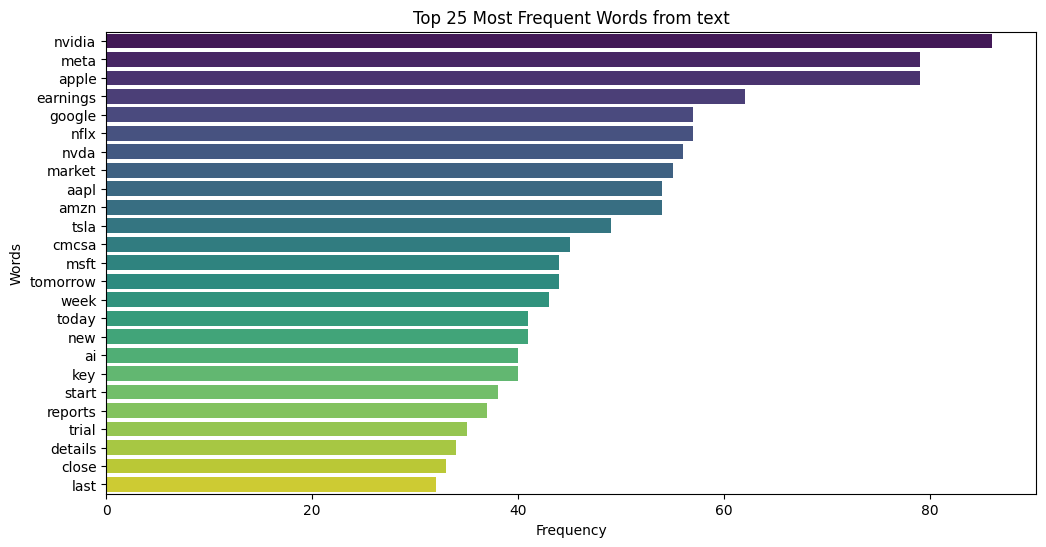

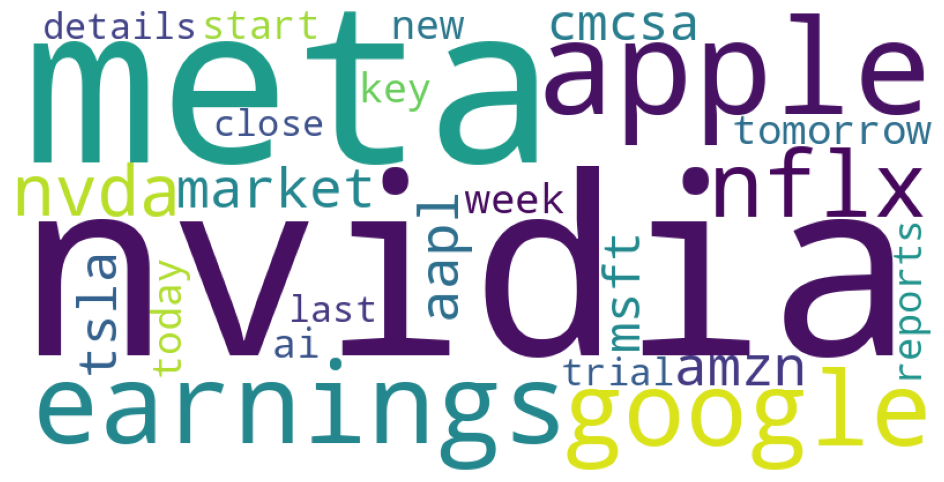

/tmp/ipykernel_9281/3537336777.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


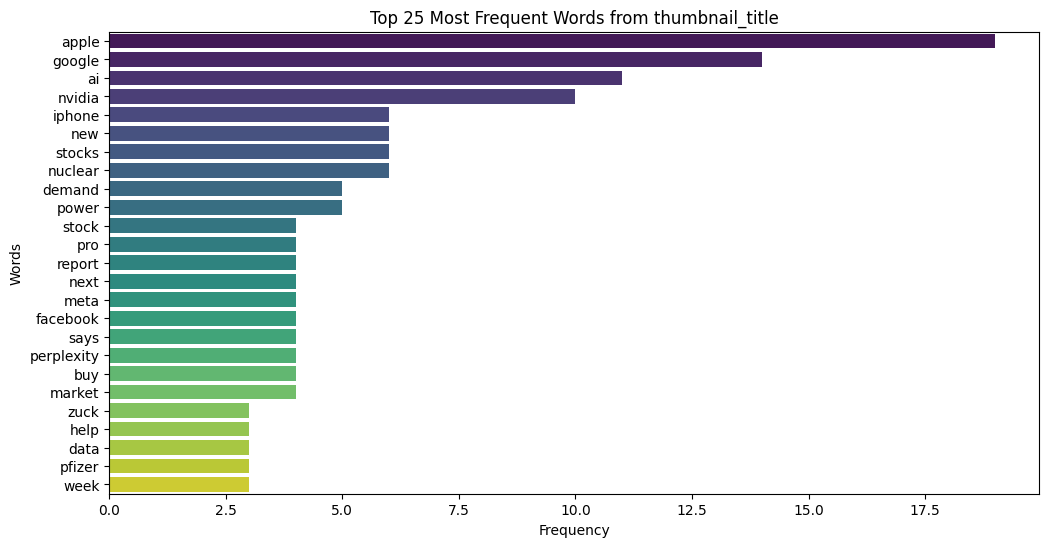

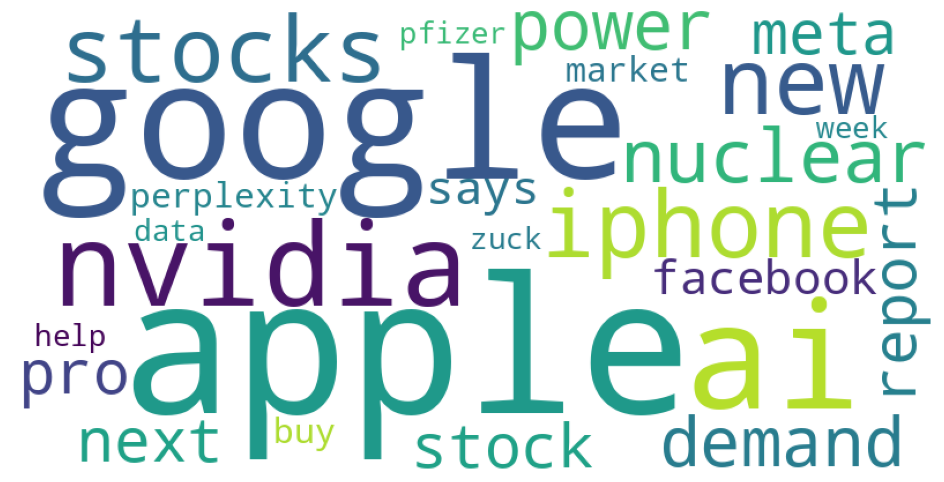

In [17]:
tw = TweetTokenizer()

special_symbols = ['‚Äú', '‚Äô', '‚Äù', '‚Ä¶', '...']
noise = stopwords.words("english") + list(punctuation) + special_symbols

def remove_stop_words(x):
    res = []
    for token in tw.tokenize(x.lower()):
        if token not in noise:
            res.append(token)
    return res

def process_text_att(data, col_name, top_count=25):
    word_counts = data[col_name].apply(remove_stop_words).explode().value_counts()[:top_count]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts.to_dict())
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {top_count} Most Frequent Words from {data[col_name].name}')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
process_text_att(df, 'text')
process_text_att(df, 'thumbnail_title')

In [18]:
df['hashtags'].unique()

array(['[]', "['dividendstocks']", "['ElonMusk']", "['Sahm']",
       "['Lennar', 'Florida']", "['AI']", "['fridaynightdump']",
       "['Nike']", "['toosoon']", "['IBM', 'Earnings', 'Tech']",
       "['AI', 'StockMarket', 'investing']",
       "['Investing', 'DowJones', 'StockMarket']",
       "['StockMarket', 'FedRateCut', 'TechStocks']",
       "['Microsoft', 'Dividends', 'StockMarket']",
       "['NVIDIA', 'StockMarket', 'Investing']"], dtype=object)

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å–ø–∏—Å–æ–∫ —Ö–µ—à—Ç–µ–≥–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç —Å—Ç—Ä–æ–∫–∏

In [19]:
df['hashtags'] = df['hashtags'].apply(lambda x: ' '.join(eval(x)))

/tmp/ipykernel_9281/3537336777.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts.values, y=word_counts.index, palette='viridis')


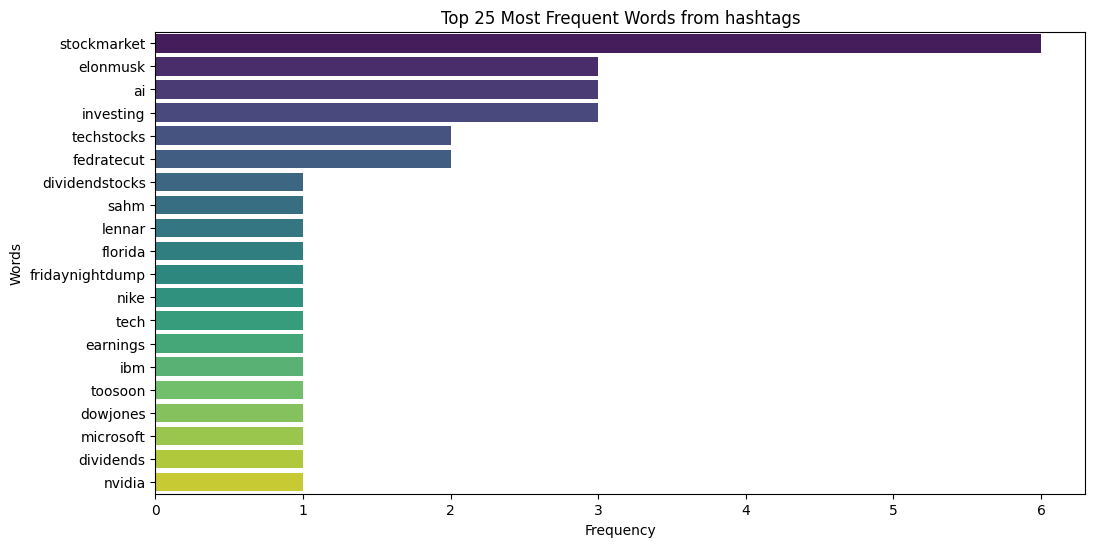

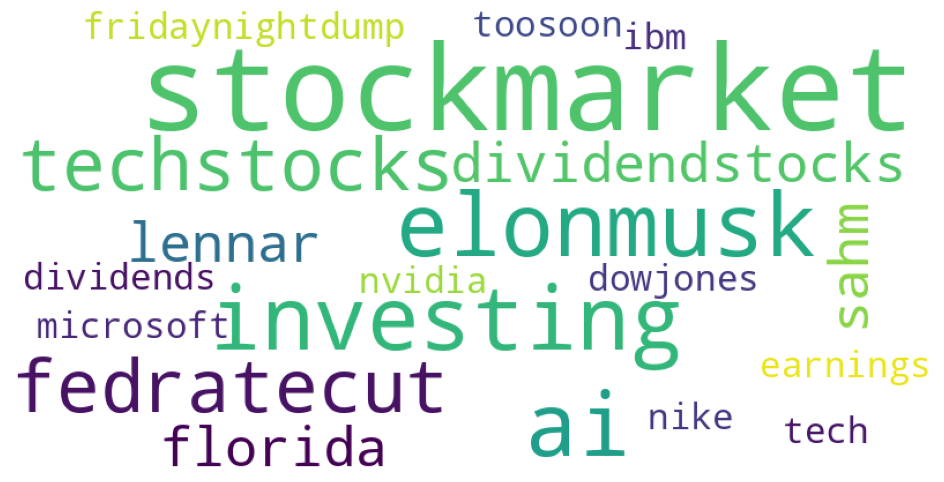

In [20]:
process_text_att(df, 'hashtags')

In [21]:
df[df['thumbnail_title'] == ''].shape

(452, 18)

In [22]:
df[df['hashtags'] == ''].shape

(510, 18)

In [23]:
df['text'] = df['text'] + ' ' + df['thumbnail_title'] + ' ' + df['hashtags']
df = df.drop(['thumbnail_title', 'hashtags'], axis=1)

### –¢–∏–∫–µ—Ä—ã —Å–∞–º—ã—Ö —É–ø–æ–º—è–Ω–∞–µ–º—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π ###

/tmp/ipykernel_9281/265398946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticker_count.values, y=ticker_count.index, palette='viridis')


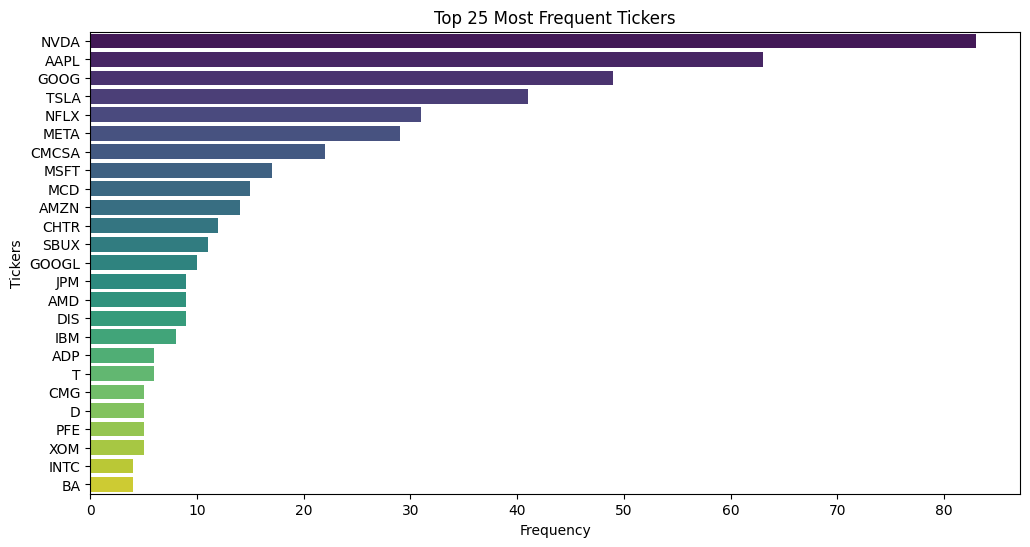

In [24]:
ticker_count = df['ticker'].value_counts()[:25]

plt.figure(figsize=(12, 6))
sns.barplot(x=ticker_count.values, y=ticker_count.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Tickers')
plt.title('Top 25 Most Frequent Tickers')
plt.show()

### date ###

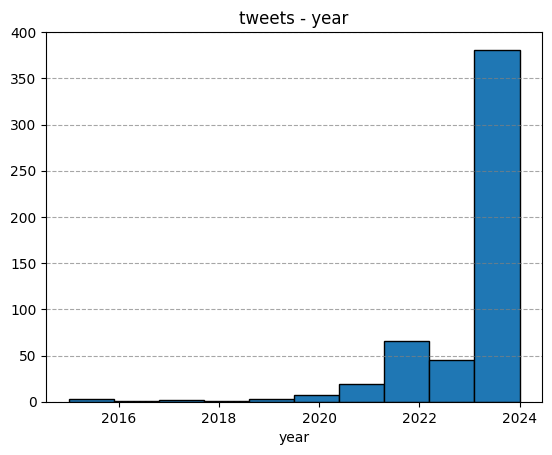

In [25]:
def create_hist(x, x_bins=None):  
    fig, ax = plt.subplots()
       
    ax.hist(x, edgecolor='black', bins=x_bins)    
      
    ax.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)    
    ax.set_xlabel(x.name)   
    ax.set_title(f'tweets - {x.name}')    
    plt.show()
    
create_hist(df['year'])

### text ###

–ü—Ä–æ—Ü–µ–Ω—Ç —Ç–≤–∏—Ç–æ–≤ —Å —É–ø–æ–º—è–Ω–∞–Ω–∏–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∫–æ–º–ø–∞–Ω–∏–π –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª-–≤–∞ —Ç–≤–∏—Ç–æ–≤:

In [26]:
(df.shape[0] - df['text'].unique().shape[0]) / df.shape[0]

0.23484848484848486

### lang ###

–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:

In [27]:
df['lang'].unique()

array(['en', 'lv', 'sv', 'qct', 'es', 'fr', 'und', 'qme'], dtype=object)

In [28]:
for lang in df['lang'].unique():
    text_sample = df[df['lang'] == lang].iloc[0]['text']
    print(f'{lang = }: {text_sample}')

lang = 'en': The chance of $MSFT winning an  appeal of the negative ruling from the CMA are exceedingly slim. Per UBS, the Competition Appeal Tribunal that would hear an appeal has not ruled in favor of merging parties for years. Appeal could also take a year.Getting very close to "all dead". https://t.co/3bGHnuM1b7  
lang = 'lv': Tesla, $TSLA unveils "Robovan" https://t.co/2WipLfdtIE  
lang = 'sv': @asharoraa meta dinner!  
lang = 'qct': $GOOG  
lang = 'es': $NFLX slide - consolidation in Media Landscape https://t.co/wYOH2IWrqE  
lang = 'fr': Chart crime nomination - $T https://t.co/iNEK4e0dS6  
lang = 'und': $CMG 2016  
lang = 'qme': ü§î

$SBUX $CMG  


–ö–æ–¥–∏—Ä–æ–≤–∫–∞ —è–∑—ã–∫–æ–≤ –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–≥–æ API —Ç–≤–∏—Ç–µ—Ä–∞ https://developer.x.com/en/docs/x-for-websites/supported-languages –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –∫–æ–¥–∏—Ä–æ–≤–∫–æ–π –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Twikit, —Å –ø–æ–º–æ—â—å—é –∫–æ—Ç–æ—Ä–æ–π –±—ã–ª–∏ —Å–æ–±—Ä–∞–Ω–Ω—ã –¥–∞–Ω–Ω—ã–µ.

–í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Twikit, –º–Ω–µ –Ω–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∫–æ–¥–∏—Ä–æ–≤–∫–∏ —è–∑—ã–∫–æ–≤, –ø–æ—ç—Ç–æ–º—É —è —Ä–µ—à–∏–ª —É–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ lang –∏–∑ –¥–∞—Ç–∞ —Å–µ—Ç–∞, —Å —É—á–µ—Ç–æ–º —Ç–æ–≥–æ, —á—Ç–æ —Å—É–¥—è –ø–æ –≤—Å–µ–º—É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö —Å–æ–∫—Ä–∞—â–µ–Ω–∏—è –Ω–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ —è–∑—ã–∫–∞–º –∏–ª–∏ –∂–µ –æ–Ω–∏ –≤—Å–µ-—Ç–∞–∫–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∫–∏ —è–∑—ã–∫–æ–≤, –Ω–æ –ø–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –º–Ω–µ –æ—à–∏–±–∫–µ –≤—ã–≤–æ–¥—è—Ç—Å—è –Ω–µ–∫–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. 

–î–∞–ª–µ–µ –ø—Ä–∏–º–µ–º, —á—Ç–æ –≤—Å–µ —Ç–≤–∏—Ç—ã –Ω–∞–ø–∏—Å–∞–Ω—ã –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º —è–∑—ã–∫–µ. –≠—Ç–æ –¥–æ–ø—É—â–µ–Ω–∏–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –ø–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–µ —Å–æ–±—Ä–∞–Ω—ã –∏–∑ –∞–Ω–≥–ª–æ—è–∑—ã—á–Ω—ã—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤.

In [29]:
df = df.drop('lang', axis=1)

### in_reply_to ###

–ó–∞–º–µ–Ω–µ–º –ø—Ä–∏–∑–Ω–∞–∫ in_reply_to –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ is_in_reply_to, —É–∫–∞–∑—ã–≤–∞—é—â–∏–π –Ω–∞ —Ç–∏–ø —Ç–≤–∏—Ç–∞, —è–≤–ª—è–µ—Ç—Å—è –æ–Ω –æ—Ç–≤–µ—Ç–æ–º –Ω–∞ –¥—Ä—É–≥–æ–π —Ç–≤–∏—Ç –∏–ª–∏ –Ω–µ—Ç: –æ—Ç–≤–µ—Ç (1), –∏–Ω–∞—á–µ (0). –í —Ü–µ–ª–æ–º, –±—ã–ª–æ –±—ã –ø–æ–ª–µ–∑–Ω–æ —É–∑–Ω–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–≤–∏—Ç–µ, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–π –±—ã–ª –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω –æ—Ç–≤–µ—Ç, –Ω–æ –¥–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Ç–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ —Å–µ–±–µ –Ω–µ —Ö—Ä–∞–Ω–∏—Ç.

In [30]:
df['is_in_reply_to'] = df['in_reply_to'].fillna(0).apply(lambda x: 0 if x == 0 else 1)
df.drop('in_reply_to', axis=1, inplace=True)

### –û–±—Ä–∞–±–æ—Ç–∫–∞ bool –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ###

In [31]:
df.select_dtypes(include='bool').columns

Index(['is_quote_status', 'favorited', 'is_translatable', 'has_card'], dtype='object')

In [32]:
for col_name in df.columns:
    if df[col_name].dtypes == bool:
        df[col_name] = df[col_name].apply(int)

### favorited ###

In [33]:
df['favorited'].unique()

array([0])

In [34]:
df.drop('favorited', axis=1, inplace=True)

### _count –ø—Ä–∏–∑–Ω–∞–∫–∏ ###

view_count_state —ç—Ç–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ–Ω –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –¥–æ—Å—Ç—É–ø–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö —Ç–≤–∏—Ç–∞—Ö. –≠—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ –¥–≤–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –ø–æ—ç—Ç–æ–º—É –µ–≥–æ –º–æ–∂–Ω–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –≤ –±–∏–Ω–∞—Ä–Ω—ã–π - 1, –µ—Å–ª–∏ –∫–æ–ª-–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –¥–æ—Å—Ç—É–ø–Ω–æ; 0, –µ—Å–ª–∏ –∫–æ–ª-–≤–æ —Ç–≤–∏—Ç–æ–≤ –Ω–µ–¥–æ—Å—Ç—É–ø–Ω–æ.

In [35]:
df['is_view_count'] = df['view_count_state'].apply(lambda x: 1 if x == 'EnabledWithCount' else 0)
df = df.drop('view_count_state', axis=1)

–û—Å—Ç–∞–ª—å–Ω—ã–µ _count –ø—Ä–∏–∑–Ω–∞–∫–∏ —è–≤–ª—è–µ—é—Ç—Å—è —á–∏—Å–ª–µ–Ω–Ω—ã–º–∏.

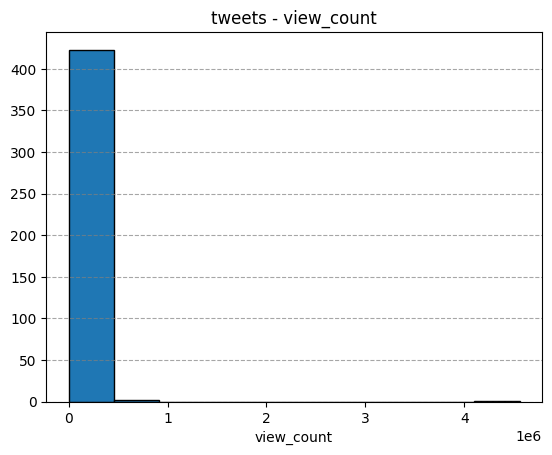

In [36]:
create_hist(df['view_count'])

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤: 

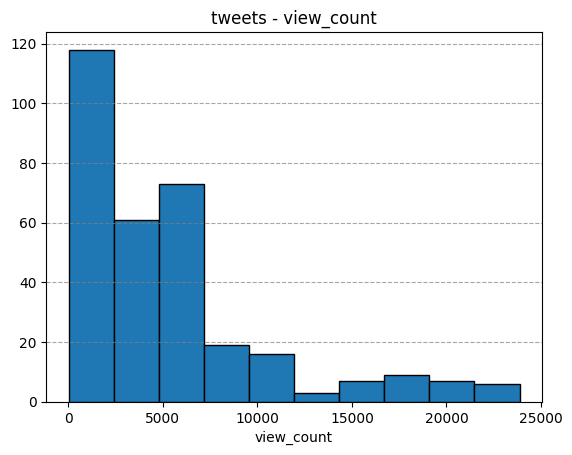

In [37]:
create_hist(df[df['view_count'] <= df['view_count'].quantile(0.75)]['view_count'])

### edits_remaining ###

In [38]:
df['edits_remaining'].unique()

array([ 5., nan])

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø–æ–ø—ã—Ç–æ–∫ —Ä–∞–≤–Ω–æ 5.

In [39]:
df = df.drop('edits_remaining', axis=1)

### urls ###

–£–ø—Ä–æ—Å—Ç–∏–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –¥–æ –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞–ª–∏—á–∏—è —Å—Å—ã–ª–æ–∫ –≤ —Ç–≤–∏—Ç–µ.

In [40]:
df['urls'].unique()

array(['[]',
       "[{'display_url': 'spr.ly/6017UZthT', 'expanded_url': 'http://spr.ly/6017UZthT', 'url': 'https://t.co/LNuxk99HPs', 'indices': [134, 157]}]",
       "[{'display_url': 'unusualwhales.com/hottest-contra‚Ä¶', 'expanded_url': 'https://unusualwhales.com/hottest-contracts?limit=250&hide_index_etf=true&vol_greater_oi=true&max_multileg_volume_ratio=0.05&order=bid_ask_prem&order_direction=desc&min_premium=250000', 'url': 'https://t.co/bzo7DltDVW', 'indices': [142, 165]}]",
       "[{'display_url': 'unusualwhales.com/discord-bot', 'expanded_url': 'http://unusualwhales.com/discord-bot', 'url': 'https://t.co/lIDpnCxZai', 'indices': [140, 163]}]",
       "[{'display_url': 'unusualwhales.com/news/google-go‚Ä¶', 'expanded_url': 'https://unusualwhales.com/news/google-googl-goog-is-funding-the-construction-of-7-small-nuclear-power-reactors-in-the-us-to-help-with-energy-needed-for-ai', 'url': 'https://t.co/jrvaIL7g5U', 'indices': [114, 137]}]",
       "[{'display_url': 'trib.al/ok4s7j

In [41]:
df['urls'] = df['urls'].apply(lambda x: 1 if x != '[]' else 0)

### –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –æ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º ### 

In [42]:
for col_name in df.columns:
    if df[col_name].unique().shape[0] == 1:
        df = df.drop(col_name, axis=1)
        print(f'{col_name} deleted')

is_translatable deleted


### –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –æ –∫–æ—Ç–∏—Ä–æ–≤–∫–∞—Ö ###

In [43]:
qs0 = pd.read_csv('../../quotes/quotes.csv')
qs1 = pd.read_csv('../../quotes/quotes_08-11-2024.csv')
qs2 = pd.read_csv('../../quotes/quotes_08-11-2024_1.csv')

qs0 = qs0.drop(['Unnamed: 0', 'id'], axis=1).rename({'quote_date': 'date'}, axis=1)[qs1.columns]
qs = pd.concat([qs0, qs1, qs2])

qs['date'] = pd.to_datetime(qs['date'])
qs = qs.drop(['high', 'low', 'volume'], axis=1)
qs = qs.drop_duplicates().reset_index(drop='first')

qs.head()

date    open   close ticker
0 2024-10-18  236.18  235.00   AAPL
1 2024-10-17  233.43  232.15   AAPL
2 2024-10-16  231.60  231.78   AAPL
3 2024-10-15  233.61  233.85   AAPL
4 2024-10-14  228.70  231.30   AAPL

In [44]:

def open_price(X, Q):
    '''
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç X c –Ω–æ–≤—ã–º–∏ 
    –∞—Ç—Ç—Ä–∏–±—É—Ç–∞–º–∏ quote_date –∏ open, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –∏–∑
    –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å –∫–æ—Ç–∏—Ä–æ–≤–∫–∞–º–∏ Q.
    
    open - —Ü–µ–Ω–∞ –æ—Ç–∫—Ä—ã—Ç–∏—è –≤ –¥–µ–Ω—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∏–ª–∏ –≤ 
    –ø–µ—Ä–≤—ã–π –¥–æ—Å—Ç—É–ø–Ω—ã–π –¥–µ–Ω—å –¥–æ —ç—Ç–æ–π –¥–∞—Ç—ã
    
    quote_date - –¥–∞—Ç–∞ –∫–æ—Ç–∏—Ä–æ–≤–∫–∏ 
    '''
    def func(x):
        '''
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ—Ç–∏—Ä–æ–≤–∫—É, —Å–æ–æ—Ç–≤–µ—Ç–≤—É—é—â—É—é 
        –¥–∞—Ç–µ –∏ —Ç–∏–∫–µ—Ä—É –∏–∑ x. –ï—Å–ª–∏ —Ç–∞–∫–æ–π –∫–æ—Ç–∏—Ä–æ–≤–∫–∏
        –Ω–µ—Ç, –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ None
        '''
        current_date = str(x['date'].date())
        ticker_name = x['ticker']
        filtered = Q[(Q['date'] <= current_date) & (Q['ticker'] == ticker_name)].sort_values(by='date', ascending=False)
        if filtered.empty:
            return None
        return filtered.iloc[0]
        
    buf = X.apply(func, axis=1).rename({'date': 'quote_date',
                                        'open': 'open_last'},
                                       axis=1).drop(['close', 'ticker'], axis=1)
    
    return pd.concat([X, buf], axis=1)

In [45]:
df = open_price(df, qs)

In [46]:
def close_price(X, Q, days = 1):
    '''
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç X c –Ω–æ–≤—ã–º 
    –∞—Ç—Ç—Ä–∏–±—É—Ç–æ–º close_{days}_day_after, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –∏–∑
    –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å –∫–æ—Ç–∏—Ä–æ–≤–∫–∞–º–∏ Q. –≠—Ç–æ—Ç –∞—Ç—Ä–∏–±—É—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç —Ü–µ–Ω—É –∑–∞–∫—Ä—ã—Ç–∏—è
    —á–µ—Ä–µ–∑ days –¥–Ω–µ–π –ø–æ—Å–ª–µ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ —Ç–≤–∏—Ç–∞ (–æ—Ç—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –æ—Ç –¥–∞—Ç—ã 
    –ø–æ—Å–ª–µ–¥–Ω–µ–π –∫–æ—Ç–∏—Ä–æ–≤–∫–∏).
    '''
    def func(x):
        '''
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ—Ç–∏—Ä–æ–≤–∫—É, —Å–æ–æ—Ç–≤–µ—Ç–≤—É—é—â—É—é –¥–∞—Ç–µ
        —á–µ—Ä–µ–∑ days –¥–Ω–µ–π –ø–æ—Å–ª–µ –¥–∞—Ç—ã –ø–æ—Å–ª–µ–¥–Ω–µ–π –∫–æ—Ç–∏—Ä–æ–≤–∫–∏ –∏ —Ç–∏–∫–µ—Ä—É –∏–∑ x. 
        –ï—Å–ª–∏ —Ç–∞–∫–æ–π –∫–æ—Ç–∏—Ä–æ–≤–∫–∏ –Ω–µ—Ç, –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ None
        '''
        current_date = x['quote_date'].date()
        ticker_name = x['ticker']
        next_date = current_date + pd.to_timedelta(days, unit='d')
        filtered = Q[(Q['date'] >= str(next_date)) & (Q['ticker'] == ticker_name)].sort_values(by='date')
        if filtered.empty:
            return None
        return filtered.iloc[0]
    
    buf = X.apply(func, axis=1).rename({'close': f'close_{days}_day_after'},
                                       axis=1).drop(['open', 'ticker', 'date'], axis=1)
    
    return pd.concat([X, buf], axis=1)

In [47]:
df = close_price(df, qs, 1)
# df = close_price(df, qs, 3)
# df = close_price(df, qs, 7)

In [48]:
df

text  is_quote_status  \
0    The chance of $MSFT winning an  appeal of the ...                0   
1    We love and appreciate all the volunteers at t...                0   
2    Today walking the lab on the NJ beach - tomorr...                0   
3    Today walking the lab on the NJ beach - tomorr...                0   
4    Good Morning from a dog walk on the $NVDA resc...                0   
..                                                 ...              ...   
523  Autonomy takes center stage in this quarter's ...                0   
524  Had to eat McDonalds over Wendy's this morning...                0   
525                             $BA big equity raise                  0   
526  $JPM gives the BTC miners 9 months to get a de...                0   
527  @StevenWalkerCFA @BillAckman Yes, dropping CFA...                0   

                         date  view_count  has_card  urls ticker  day  month  \
0   2023-04-26 12:23:58+00:00    113387.0         0     0   MSFT   26      4   
1   2024-05-06 13:54:43+00:00       707.0         0     0   NVDA    6      5   
2   2024-05-08 13:11:46+00:00       702.0         0     0   META    8      5   
3   2024-05-08 13:11:46+00:00       702.0         0     0   NVDA    8      5   
4   2024-05-05 13:56:44+00:00       934.0         0     0   NVDA    5      5   
..                        ...         ...       ...   ...    ...  ...    ...   
523 2024-10-25 21:04:57+00:00      6220.0         1     0   TSLA   25     10   
524 2024-09-23 14:04:14+00:00     18324.0         0     0    MCD   23      9   
525 2024-10-28 10:51:25+00:00      1021.0         0     0     BA   28     10   
526 2024-10-24 13:17:26+00:00      1071.0         1     1    JPM   24     10   
527 2024-08-23 18:13:51+00:00       106.0         0     0      D   23      8   

     year  is_in_reply_to  is_view_count quote_date  open_last  \
0    2023               0              1 2023-04-26    296.700   
1    2024               0              1 2024-05-06    893.900   
2    2024               0              1 2024-05-08    463.500   
3    2024               0              1 2024-05-08    894.825   
4    2024               0              1 2024-05-03    877.890   
..    ...             ...            ...        ...        ...   
523  2024               0              1 2024-10-25    256.010   
524  2024               0              1 2024-09-23    299.000   
525  2024               0              1 2024-10-28    153.500   
526  2024               0              1 2024-10-24    221.830   
527  2024               1              1 2024-08-23     56.620   

     close_1_day_after  
0               304.83  
1               905.54  
2               475.42  
3               887.47  
4               921.40  
..                 ...  
523             262.51  
524             300.27  
525             152.98  
526             222.31  
527              56.52  

[528 rows x 15 columns]

–ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [49]:
df.isna().sum()

text                   0
is_quote_status        0
date                   0
view_count           102
has_card               0
urls                   0
ticker                 0
day                    0
month                  0
year                   0
is_in_reply_to         0
is_view_count          0
quote_date             0
open_last              0
close_1_day_after      1
dtype: int64

In [50]:
df['view_count'].fillna(df['view_count'].median(), inplace=True)

/tmp/ipykernel_9281/1370579765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['view_count'].fillna(df['view_count'].median(), inplace=True)


In [51]:
df = df.dropna()
df = df.drop(['date', 'quote_date'], axis=1)

### –°–æ–∑–¥–∞–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ ###

In [52]:
class –°lsTargetTransformer(BaseEstimator, TransformerMixin):
    '''
    –ö–ª–∞—Å—Å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞, —Å–æ–∑–¥–∞—é—â–µ–≥–æ —Ç–∞—Ä–≥–µ—Ç –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.
    –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –∑–∞–¥–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ –ø—Ä–æ—Ü–µ–Ω—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –ø—Ä–∏–±—ã–ª–∏.
    '''
    def __init__(self, shift_percent=0):
        """
        –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–∞ —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.
        :param shift_percent: –ü–æ—Ä–æ–≥ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–∞—Ä–≥–µ—Ç–∞ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ).
        """
        self.shift_percent = shift_percent

    def transform(self, X):
        """
        –ú–µ—Ç–æ–¥ transform: –ø—Ä–∏–º–µ–Ω—è–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫ –¥–∞–Ω–Ω—ã–º.
        :param X: –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.
        :return: –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.
        """
        X_copy = X.copy()

        # for k in [1, 3, 7]:
        for k in [1]:
            col_name = f'{k}_day_after'
            X_copy[col_name] = (X_copy[f'close_{k}_day_after'] / X_copy['open_last'] - 1) * 100 - self.shift_percent
            X_copy[col_name] = X_copy[col_name].apply(lambda x: 1 if x >= 0 else 0)

        # X_copy = X_copy.drop(['close_1_day_after', 'close_3_day_after', 'close_7_day_after', 'open_last'], axis=1)
        X_copy = X_copy.drop(['close_1_day_after', 'open_last'], axis=1)

        return X_copy

In [53]:
class_target_transformer = –°lsTargetTransformer()

df0 = class_target_transformer.transform(df)

df0.head()

text  is_quote_status  \
0  The chance of $MSFT winning an  appeal of the ...                0   
1  We love and appreciate all the volunteers at t...                0   
2  Today walking the lab on the NJ beach - tomorr...                0   
3  Today walking the lab on the NJ beach - tomorr...                0   
4  Good Morning from a dog walk on the $NVDA resc...                0   

   view_count  has_card  urls ticker  day  month  year  is_in_reply_to  \
0    113387.0         0     0   MSFT   26      4  2023               0   
1       707.0         0     0   NVDA    6      5  2024               0   
2       702.0         0     0   META    8      5  2024               0   
3       702.0         0     0   NVDA    8      5  2024               0   
4       934.0         0     0   NVDA    5      5  2024               0   

   is_view_count  1_day_after  
0              1            1  
1              1            1  
2              1            1  
3              1            0  
4              1            1

In [54]:
target_cols = ['1_day_after']

for col in target_cols:
    buf = df0[col].value_counts(normalize=True)
    print(buf.to_frame())
    print('-' * 25)

             proportion
1_day_after            
1              0.531309
0              0.468691
-------------------------


In [55]:
df0 = df0.drop('ticker', axis=1)

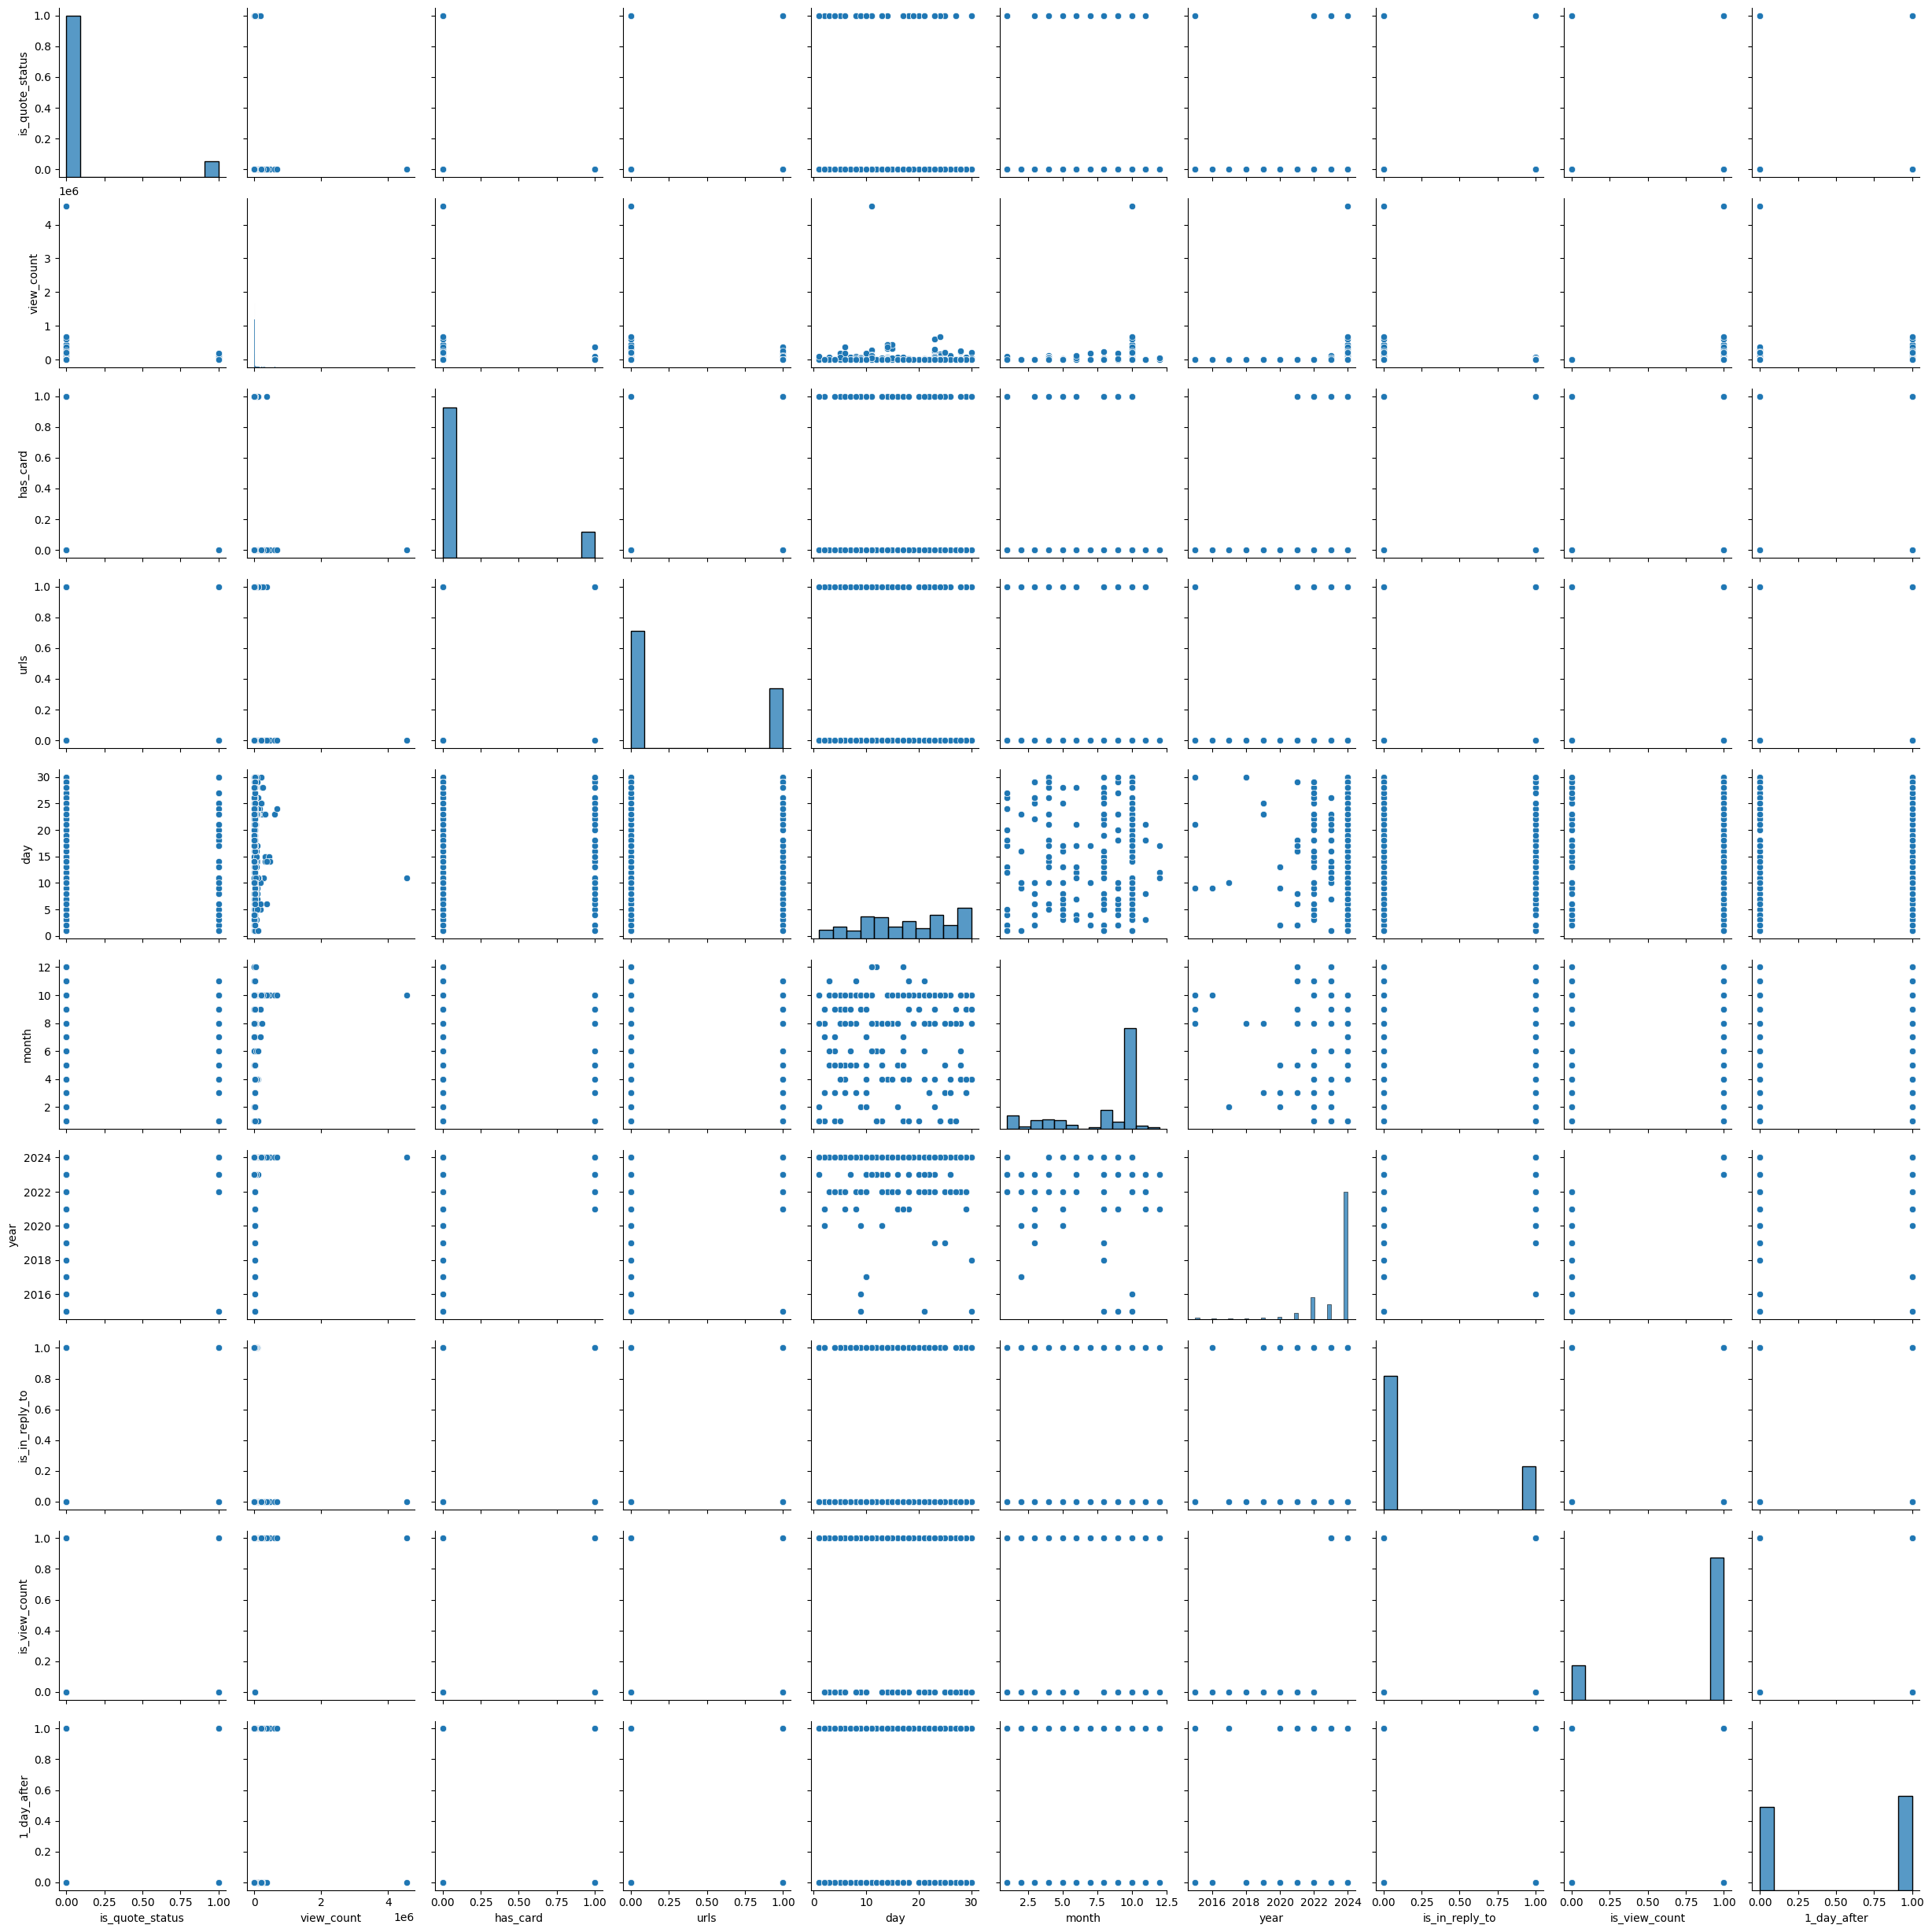

In [56]:
sns.pairplot(df0)

In [57]:
df0_corr = df0.select_dtypes(include='number').corr()
df0_corr

is_quote_status  view_count  has_card      urls       day  \
is_quote_status         1.000000   -0.036747 -0.128893 -0.191448 -0.093742   
view_count             -0.036747    1.000000 -0.035659 -0.059316 -0.031578   
has_card               -0.128893   -0.035659  1.000000  0.574786  0.032426   
urls                   -0.191448   -0.059316  0.574786  1.000000  0.166683   
day                    -0.093742   -0.031578  0.032426  0.166683  1.000000   
month                   0.010701    0.092157  0.079975  0.214516  0.122123   
year                    0.030779    0.076977  0.131498  0.210753  0.093639   
is_in_reply_to         -0.113516   -0.089762 -0.075724 -0.208628 -0.126545   
is_view_count           0.032386    0.078446  0.123036  0.216182  0.073962   
1_day_after             0.007541   -0.017405  0.038098  0.007715 -0.075659   

                    month      year  is_in_reply_to  is_view_count  \
is_quote_status  0.010701  0.030779       -0.113516       0.032386   
view_count       0.092157  0.076977       -0.089762       0.078446   
has_card         0.079975  0.131498       -0.075724       0.123036   
urls             0.214516  0.210753       -0.208628       0.216182   
day              0.122123  0.093639       -0.126545       0.073962   
month            1.000000  0.353673       -0.285966       0.355198   
year             0.353673  1.000000       -0.181578       0.819162   
is_in_reply_to  -0.285966 -0.181578        1.000000      -0.201433   
is_view_count    0.355198  0.819162       -0.201433       1.000000   
1_day_after      0.108945  0.152554       -0.040142       0.175108   

                 1_day_after  
is_quote_status     0.007541  
view_count         -0.017405  
has_card            0.038098  
urls                0.007715  
day                -0.075659  
month               0.108945  
year                0.152554  
is_in_reply_to     -0.040142  
is_view_count       0.175108  
1_day_after         1.000000

<Axes: >

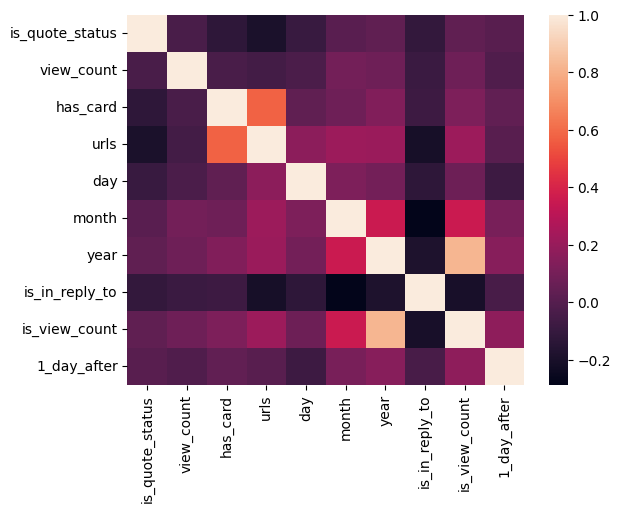

In [58]:
sns.heatmap(df0_corr)

In [59]:
df0.to_csv('../tweets.csv')

### –í—ã–≤–æ–¥—ã ###

- –†–∞–∑–º–µ—á–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –ø–æ–ª—É—á–∏–ª—Å—è —Å–ª–∏—à–∫–æ–º –º–∞–ª—å–Ω—å–∫–∏–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ç–≤–∏—Ç—Ç–µ—Ä–∞. –í —Ç–µ–∫—É—â–µ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –µ–≥–æ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –±–æ–ª–µ–µ –æ–±—ä–µ–º–Ω–æ–π –º–æ–¥–µ–ª–∏.
- –ü—Ä–æ–±–ª–µ–º–∞ –º–∞–ª–æ–≥–æ –∫–æ–ª-–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –¥–∞—Ç–∞ —Å–µ—Ç–µ —Å–≤—è–∑–∞–Ω–∞ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å —Å –Ω–µ —Å–∞–º—ã–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –ø–æ–¥—Ö–æ–¥–æ–º –¥–ª—è —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ç–≤–∏—Ç–µ—Ä–∞. –¢–∞–∫ –∂–µ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–º –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–π –∫–æ–º–ø–∞–Ω–∏–π –Ω–∞ —ç—Ç–∞–ø–µ –≤—ã—è–≤–ª–µ–Ω–∏—è —Ç–∏–∫–µ—Ä–æ–≤ –∏–∑ —É–∂–µ —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤.

### –ß—Ç–æ –º–æ–∂–Ω–æ –∏—Å–ø—Ä–∞–≤–∏—Ç—å? ###

- –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–∞—Ä—Å–µ—Ä
- –î–æ–±–∞–≤–∏—Ç—å –±–æ–ª—å—à–µ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–π –∫–æ–º–ø–∞–Ω–∏–π